1. 读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [44]:
import pandas as pd
import csv

df=pd.read_csv('open_rank_20236.csv')

max_value=df1['value'].max()
min_value=df1['value'].min()
mean_value=df1['value'].mean()
median_value=df1['value'].median()
print(max_value,' ',min_value,' ',mean_value,' ',median_value)

1394.45   200.68   346.9679   273.66999999999996


2. 读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

In [43]:
import pandas as pd
import csv

df=pd.read_csv('activity_2022.csv')
for i in range(10):
    print((df['202212_value'][i]/df['20221_value'][i])**(1/11)-1)


-0.022075499453258596
-0.0028857600306391173
-0.027058420601148492
-0.012726334787778626
0.00400468700013934
-0.017686377215096694
0.0030083016800697138
0.01891694699249391
0.01103207108243276
-0.00863425695013087


3. data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

In [ ]:
import pandas as pd
import csv

df1=pd.read_csv('china_2022.csv')
df2=pd.read_csv('global_2022.csv')
list1=['issue_comment','open_issue','open_pull','review_comment','merged_pull','rank','value','rankDelta','valueDelta']
china_stats={
    'max':[],
    'min':[],
    'mean':[],
    'median':[]
}
global_stats={
    'max':[],
    'min':[],
    'mean':[],
    'median':[]
}
for i in range(9):
    china_stats['max'].append(df1[list1[i]].max())
    china_stats['min'].append(df1[list1[i]].min())
    china_stats['mean'].append(df1[list1[i]].mean())
    china_stats['median'].append(df1[list1[i]].median())
    global_stats['max'].append(df2[list1[i]].max())
    global_stats['min'].append(df2[list1[i]].min())
    global_stats['mean'].append(df2[list1[i]].mean())
    global_stats['median'].append(df2[list1[i]].median())
print(china_stats) # 中国的基本数据 包含最大值 最小值 平均数 中位数
print(global_stats) # 全球的基本数据


{'max': [167814, 22397, 35266, 60402, 26732, 10, 103368.49, 25, 21093.11], 'min': [11741, 752, 1823, 2113, 1165, 1, 12033.71, 0, 2329.36], 'mean': [61205.5, 9169.2, 16912.7, 19857.5, 13764.1, 5.5, 40269.534, 5.3, 9265.007000000001], 'median': [39141.0, 6889.5, 15953.0, 10851.0, 13705.5, 5.5, 29789.235, 0.0, 9882.0]}
{'max': [1437317, 189185, 309685, 456166, 257123, 10, 824848.67, 1, 57536.09], 'min': [78530, 13162, 27414, 35072, 15418, 1, 71636.82, -2, -47388.58], 'mean': [341409.4, 43300.2, 83423.0, 120392.1, 62472.0, 5.5, 215855.491, 0.1, 11906.920999999998], 'median': [178629.0, 21648.0, 49103.5, 70433.5, 33288.0, 5.5, 102790.85, 0.0, 14209.235]}


4. 贝叶斯定理

    贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86

    根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

    非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

    工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

    已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

A 为项目带有 HTML，B为非软件
P(B|A)=P(A|B)*P(B)/(P(A|B)*P(B)+P(A|B-)*P(B-))=(0.85*0.25)/(0.85*0.25+0.75*0.1)=0.739

5. 接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？



A 为 JavaScript 写的  B为工具组件型项目
P(B|A)=P(A|B)*P(B)/(P(A|B)*P(B)+P(A|B-)*P(B-))=(0.35*0.5)/(0.35*0.5+0.1*0.5)=0.778

6. 根据以下数据建立可视化无向图

    user = [1, 2, 3, 4] 

    edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

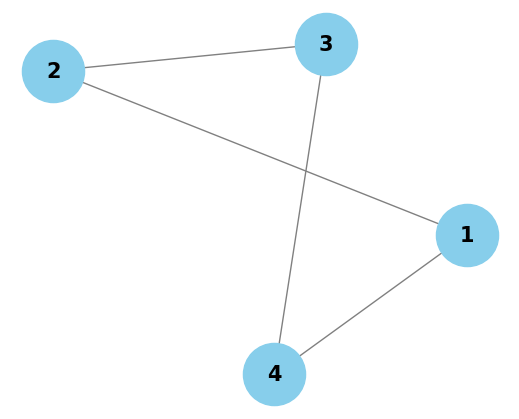

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.Graph()
edge=[(1,2),(2,3),(3,4),(4,1)]
G.add_edges_from(edge) # 建边
plt.figure(figsize=(5,4))
nx.draw(G,with_labels=True,node_color='skyblue',node_size=2000,edge_color='gray',font_size=15,font_weight='bold')
plt.show()

7. 根据以下数据建立可视化**有向图**

    users = [0, 1, 2, 3, 4, 5, 6,7,8,9]
    
    edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
                (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
                (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

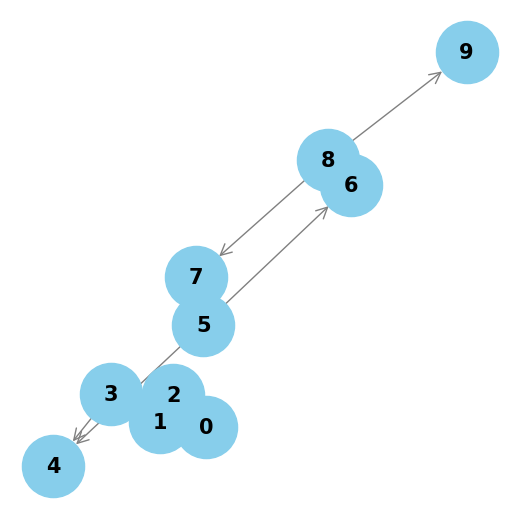

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.DiGraph()
edge=[(0,1),(1,0),(0,2),(2,0),(1,2),
                (2,1),(1,3),(2,3),(3,4),(5,4),
                (5,6),(7,5),(6,8),(8,7),(8,9)]
G.add_edges_from(edge) # 建边
plt.figure(figsize=(5,5))
nx.draw(G,with_labels=True,node_color='skyblue',node_size=2000,edge_color='gray',font_size=15,font_weight='bold',arrowsize=20,arrowstyle='->')
plt.show()

8. 针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。
    pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank

{0: 0.09499069584253748, 1: 0.10547659652084884, 2: 0.10547659652084884, 3: 0.09499069584253748, 4: 0.15931683334639937, 5: 0.1020112395832942, 6: 0.0785753675867465, 7: 0.0785753675867465, 8: 0.1020112395832942, 9: 0.0785753675867465}


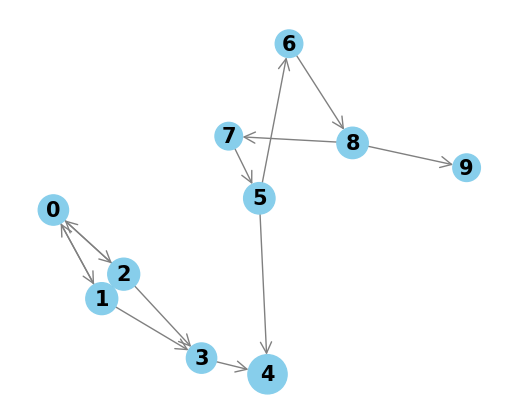

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.DiGraph()
edge=[(0,1),(1,0),(0,2),(2,0),(1,2),
                (2,1),(1,3),(2,3),(3,4),(5,4),
                (5,6),(7,5),(6,8),(8,7),(8,9)]
G.add_edges_from(edge) # 建边
pagerank1=nx.pagerank(G)
nodesize=[v*5000 for v in pagerank1.values()]
print(pagerank1)
plt.figure(figsize=(5,4))
nx.draw(G,with_labels=True,node_color='skyblue',node_size=nodesize,edge_color='gray',font_size=15,font_weight='bold',arrowsize=20,arrowstyle='->')
plt.show()